In [2]:
import pandas as pd

# Load historical and options data
historical_df = pd.read_csv('datasets/Historical_data.csv')
call_options_df = pd.read_csv('datasets/new_options_data.csv')
put_options_df = pd.read_csv('datasets/new_options_data_put.csv')

# Clean column names by removing leading/trailing whitespace
call_options_df.columns = [col.strip() for col in call_options_df.columns]
put_options_df.columns = [col.strip() for col in put_options_df.columns]

# Drop rows with missing values from historical data
historical_df = historical_df.dropna()

# Select relevant columns and remove rows with missing values in call options
call_options_df = call_options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()

# Convert 'Date' and 'Expiry' columns to datetime format
call_options_df['Date'] = pd.to_datetime(call_options_df['Date'], format='%d%b%Y')
call_options_df['Expiry'] = pd.to_datetime(call_options_df['Expiry'], format='%d%b%Y')

# Repeat the same process for put options
put_options_df = put_options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()
put_options_df['Date'] = pd.to_datetime(put_options_df['Date'], format='%d%b%Y')
put_options_df['Expiry'] = pd.to_datetime(put_options_df['Expiry'], format='%d%b%Y')

# Combine call and put options into a single DataFrame
options_df = pd.concat([call_options_df, put_options_df])

# Sort by date and reset index
options_df = options_df.sort_values(by='Date').reset_index(drop=True)

# Display the final merged options data
print(options_df)


         Symbol       Date     Expiry Option type  Strike Price    Close
0     BANKNIFTY 2024-05-02 2024-07-31          PE       47400.0  1089.15
1     BANKNIFTY 2024-05-02 2024-07-31          PE       51000.0  2300.00
2     BANKNIFTY 2024-05-02 2024-07-31          PE       50900.0  2868.60
3     BANKNIFTY 2024-05-02 2024-07-31          PE       50800.0  2804.20
4     BANKNIFTY 2024-05-02 2024-07-31          PE       50700.0  2740.60
...         ...        ...        ...         ...           ...      ...
4689  BANKNIFTY 2024-06-05 2024-07-31          CE       46400.0  3587.25
4690  BANKNIFTY 2024-06-05 2024-07-31          CE       46200.0  3797.65
4691  BANKNIFTY 2024-06-05 2024-07-31          CE       46100.0  3848.70
4692  BANKNIFTY 2024-06-05 2024-07-31          CE       49000.0  1598.45
4693  BANKNIFTY 2024-06-05 2024-07-31          CE       41000.0  8034.10

[4694 rows x 6 columns]


In [3]:
## I am evaluating the potential profit and loss based on the model’s output for a one-month Bank Nifty options position during the May–June expiry, coinciding with the election period

# Strip whitespace from column names
call_options_df.columns = [col.strip() for col in call_options_df.columns]
put_options_df.columns = [col.strip() for col in put_options_df.columns]

# Drop rows with missing values from historical data
historical_df.dropna(inplace=True)

# Select relevant columns and drop missing rows in call options
call_options_df = call_options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()

# Convert 'Date' and 'Expiry' to datetime format for call options
call_options_df['Date'] = pd.to_datetime(call_options_df['Date'], format='%d-%b-%Y')
call_options_df['Expiry'] = pd.to_datetime(call_options_df['Expiry'], format='%d-%b-%Y')

# Select relevant columns and drop missing rows in put options
put_options_df = put_options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()

# Convert 'Date' and 'Expiry' to datetime format for put options
put_options_df['Date'] = pd.to_datetime(put_options_df['Date'], format='%d%b%Y')
put_options_df['Expiry'] = pd.to_datetime(put_options_df['Expiry'], format='%d%b%Y')

# Combine call and put options data
options_df = pd.concat([call_options_df, put_options_df], ignore_index=True)

# Sort combined options data by date
options_df = options_df.sort_values(by='Date').reset_index(drop=True)

# Display final combined dataset
print(options_df)


         Symbol       Date     Expiry Option type  Strike Price    Close
0     BANKNIFTY 2024-05-02 2024-07-31          PE       47400.0  1089.15
1     BANKNIFTY 2024-05-02 2024-07-31          PE       51000.0  2300.00
2     BANKNIFTY 2024-05-02 2024-07-31          PE       50900.0  2868.60
3     BANKNIFTY 2024-05-02 2024-07-31          PE       50800.0  2804.20
4     BANKNIFTY 2024-05-02 2024-07-31          PE       50700.0  2740.60
...         ...        ...        ...         ...           ...      ...
4689  BANKNIFTY 2024-06-05 2024-07-31          CE       46400.0  3587.25
4690  BANKNIFTY 2024-06-05 2024-07-31          CE       46200.0  3797.65
4691  BANKNIFTY 2024-06-05 2024-07-31          CE       46100.0  3848.70
4692  BANKNIFTY 2024-06-05 2024-07-31          CE       49000.0  1598.45
4693  BANKNIFTY 2024-06-05 2024-07-31          CE       41000.0  8034.10

[4694 rows x 6 columns]


In [4]:
## I am evaluating the potential profit and loss based on the model’s output for a one-month Bank Nifty options position during the Jan–Feb expiry period.

# Load options and historical data
options_df = pd.read_csv('datasets/jan_feb_options_data.csv')
historical_df = pd.read_csv('datasets/jan_feb_Historical_data.csv')

# Clean column names
options_df.columns = [col.strip() for col in options_df.columns]
historical_df.columns = [col.strip() for col in historical_df.columns]

# Drop missing values in historical data
historical_df.dropna(inplace=True)

# Select relevant columns from call options and drop missing rows
options_df = options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()

# Convert date columns to datetime format
options_df['Date'] = pd.to_datetime(options_df['Date'], format='%d%b%Y')
options_df['Expiry'] = pd.to_datetime(options_df['Expiry'], format='%d%b%Y')

# Load and clean put options data
put_options_df = pd.read_csv('datasets/jan_feb_options_data_put.csv')
put_options_df.columns = [col.strip() for col in put_options_df.columns]
put_options_df = put_options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()
put_options_df['Date'] = pd.to_datetime(put_options_df['Date'], format='%d%b%Y')
put_options_df['Expiry'] = pd.to_datetime(put_options_df['Expiry'], format='%d%b%Y')

# Debug print: column names (optional)
# print(put_options_df.columns)
# print(options_df.columns)

# Combine call and put options
options_df = pd.concat([options_df, put_options_df], ignore_index=True)

# Sort by date and reset index
options_df = options_df.sort_values(by='Date').reset_index(drop=True)

# Final output
print(options_df)


         Symbol       Date     Expiry Option type  Strike Price    Close
0     BANKNIFTY 2024-01-04 2024-02-07          CE       41500.0  6499.10
1     BANKNIFTY 2024-01-04 2024-02-07          PE       47500.0   856.05
2     BANKNIFTY 2024-01-04 2024-02-07          PE       47400.0   813.60
3     BANKNIFTY 2024-01-04 2024-02-07          PE       47300.0   772.55
4     BANKNIFTY 2024-01-04 2024-02-07          PE       47200.0   732.90
...         ...        ...        ...         ...           ...      ...
3853  BANKNIFTY 2024-02-01 2024-02-07          CE       48900.0    14.55
3854  BANKNIFTY 2024-02-01 2024-02-07          CE       49000.0    13.40
3855  BANKNIFTY 2024-02-01 2024-02-07          CE       49100.0    12.15
3856  BANKNIFTY 2024-02-01 2024-02-07          CE       46500.0   336.30
3857  BANKNIFTY 2024-02-01 2024-02-07          PE       55500.0  9425.00

[3858 rows x 6 columns]


In [5]:
## Next, we will analyze a low-volatility stock, using Nifty 50 data from the 2016–2017 period. We’ll assess the performance and impact across both models over two expiry durations: 1 month and 3 months.

# Load options and historical data for NIFTY50
options_df = pd.read_csv('datasets/nifty50_options_data.csv')
historical_df = pd.read_csv('datasets/nifty50_historical.csv')

# Clean column names
options_df.columns = [col.strip() for col in options_df.columns]
historical_df.columns = [col.strip() for col in historical_df.columns]

# Drop missing values in historical data
historical_df.dropna(inplace=True)

# Select relevant columns and drop missing rows from call options
options_df = options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()

# Convert 'Date' and 'Expiry' to datetime
options_df['Date'] = pd.to_datetime(options_df['Date'], format='%d%b%Y')
options_df['Expiry'] = pd.to_datetime(options_df['Expiry'], format='%d%b%Y')

# Load and process put options data
put_options_df = pd.read_csv('datasets/nifty50_options_data_put.csv')
put_options_df.columns = [col.strip() for col in put_options_df.columns]
put_options_df = put_options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()
put_options_df['Date'] = pd.to_datetime(put_options_df['Date'], format='%d%b%Y')
put_options_df['Expiry'] = pd.to_datetime(put_options_df['Expiry'], format='%d%b%Y')

# Debug: print column names if needed
# print(put_options_df.columns)
# print(options_df.columns)

# Combine call and put options
options_df = pd.concat([options_df, put_options_df], ignore_index=True)

# Sort by date and reset index
options_df = options_df.sort_values(by='Date').reset_index(drop=True)

# Final output
print(options_df)


     Symbol       Date     Expiry Option type  Strike Price    Close
0     NIFTY 2016-12-01 2017-01-25          CE       10000.0     1.50
1     NIFTY 2016-12-01 2017-01-25          PE        7250.0     0.70
2     NIFTY 2016-12-01 2017-01-25          PE        7300.0    19.30
3     NIFTY 2016-12-01 2017-01-25          PE        7350.0     1.30
4     NIFTY 2016-12-01 2017-01-25          PE        7400.0    24.80
...     ...        ...        ...         ...           ...      ...
3303  NIFTY 2016-12-30 2017-01-25          CE        8800.0     2.35
3304  NIFTY 2016-12-30 2017-01-25          CE        8850.0     1.95
3305  NIFTY 2016-12-30 2017-01-25          CE        8900.0     1.40
3306  NIFTY 2016-12-30 2017-01-25          CE        8550.0    10.95
3307  NIFTY 2016-12-30 2017-01-25          PE        9950.0  1181.45

[3308 rows x 6 columns]


In [6]:
# Load NIFTY50 high-expiry options and historical data
options_df = pd.read_csv('datasets/high_expiry_nifty50_options_data.csv')
historical_df = pd.read_csv('datasets/nifty50_historical.csv')

# Clean column names
options_df.columns = [col.strip() for col in options_df.columns]
historical_df.columns = [col.strip() for col in historical_df.columns]

# Drop missing values from historical data
historical_df.dropna(inplace=True)

# Filter relevant columns from call options and drop missing rows
options_df = options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()

# Convert 'Date' and 'Expiry' to datetime
options_df['Date'] = pd.to_datetime(options_df['Date'], format='%d%b%Y')
options_df['Expiry'] = pd.to_datetime(options_df['Expiry'], format='%d%b%Y')

# Load and clean high-expiry put options data
put_options_df = pd.read_csv('datasets/high_expiry_options_data_put.csv')
put_options_df.columns = [col.strip() for col in put_options_df.columns]
put_options_df = put_options_df[['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close']].dropna()
put_options_df['Date'] = pd.to_datetime(put_options_df['Date'], format='%d%b%Y')
put_options_df['Expiry'] = pd.to_datetime(put_options_df['Expiry'], format='%d%b%Y')

# Debug: check column alignment before merge
print(put_options_df.columns)
print(options_df.columns)

# Merge call and put options
options_df = pd.concat([options_df, put_options_df], ignore_index=True)

# Sort merged options data by date and reset index
options_df = options_df.sort_values(by='Date').reset_index(drop=True)

# Final output
print(options_df)


Index(['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close'], dtype='object')
Index(['Symbol', 'Date', 'Expiry', 'Option type', 'Strike Price', 'Close'], dtype='object')
     Symbol       Date     Expiry Option type  Strike Price    Close
0     NIFTY 2016-12-01 2017-03-30          CE       10000.0     7.50
1     NIFTY 2016-12-01 2017-03-30          PE        6500.0    82.05
2     NIFTY 2016-12-01 2017-03-30          PE        6400.0    70.00
3     NIFTY 2016-12-01 2017-03-30          PE        6300.0    59.35
4     NIFTY 2016-12-01 2017-03-30          PE        6200.0    50.00
...     ...        ...        ...         ...           ...      ...
2871  NIFTY 2016-12-30 2017-03-30          CE        8350.0   216.75
2872  NIFTY 2016-12-30 2017-03-30          CE        8400.0   152.70
2873  NIFTY 2016-12-30 2017-03-30          CE        8450.0   178.45
2874  NIFTY 2016-12-30 2017-03-30          CE        8000.0   383.20
2875  NIFTY 2016-12-30 2017-03-30          PE        9900

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Calculate annualized volatility from historical closing prices
log_returns = np.log(historical_df['Close'] / historical_df['Close'].shift(1))
annual_volatility = log_returns.std() * np.sqrt(252)
print("Annualized Volatility:", annual_volatility)

# --------------------------
# Black-Scholes Model
# --------------------------
def black_scholes(S, K, T, r, sigma, option_type='CE'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'CE':  # Call option
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # Put option
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# --------------------------
# Binomial Model
# --------------------------
def binomial_model(S, K, T, r, sigma, steps=10, option_type='CE'):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Terminal asset prices
    prices = np.array([S * (u**(steps - i)) * (d**i) for i in range(steps + 1)])

    # Option values at maturity
    if option_type == 'CE':
        option_values = np.maximum(prices - K, 0)
    else:
        option_values = np.maximum(K - prices, 0)

    # Backward induction
    for _ in range(steps):
        option_values = discount * (p * option_values[:-1] + (1 - p) * option_values[1:])

    return option_values[0]

# --------------------------
# Parameters
# --------------------------
risk_free_rate = 0.0676  # Approximate 1-month government bond rate
current_price = historical_df['Close'].iloc[-1]  # Latest index price

# --------------------------
# Model Evaluation
# --------------------------
results = []

for _, row in options_df.iterrows():
    K = row['Strike Price']
    T = (row['Expiry'] - row['Date']).days / 365.0
    if T == 0:
        print("Zero maturity at date:", row['Date'])

    option_type = row['Option type']
    market_price = row['Close']

    bs_price = black_scholes(current_price, K, T, risk_free_rate, annual_volatility, option_type)
    bin_price = binomial_model(current_price, K, T, risk_free_rate, annual_volatility, option_type=option_type)

    results.append({
        'Type': option_type,
        'Strike': K,
        'Expiry': row['Expiry'],
        'Date': row['Date'],
        'Market Price': market_price,
        'BS Price': bs_price,
        'Binomial Price': bin_price,
        'BS Error': abs(bs_price - market_price),
        'Binomial Error': abs(bin_price - market_price),
        '% BS Error': (bs_price - market_price) / market_price,
        '% Binomial Error': (bin_price - market_price) / market_price
    })

results_df = pd.DataFrame(results)
print(results_df)

# --------------------------
# Summary Statistics
# --------------------------
print("Mean % Error (Black-Scholes):", results_df['% BS Error'].mean())
print("Mean % Error (Binomial):", results_df['% Binomial Error'].mean())


Annualized Volatility: 0.1518548058466004
     Type   Strike     Expiry       Date  Market Price     BS Price  \
0      CE  10000.0 2017-03-30 2016-12-01          7.50     5.680793   
1      PE   6500.0 2017-03-30 2016-12-01         82.05     0.322944   
2      PE   6400.0 2017-03-30 2016-12-01         70.00     0.170306   
3      PE   6300.0 2017-03-30 2016-12-01         59.35     0.086374   
4      PE   6200.0 2017-03-30 2016-12-01         50.00     0.042046   
...   ...      ...        ...        ...           ...          ...   
2871   CE   8350.0 2017-03-30 2016-12-30        216.75   233.719265   
2872   CE   8400.0 2017-03-30 2016-12-30        152.70   211.473773   
2873   CE   8450.0 2017-03-30 2016-12-30        178.45   190.756604   
2874   CE   8000.0 2017-03-30 2016-12-30        383.20   432.998436   
2875   PE   9900.0 2017-03-30 2016-12-30       1616.95  1553.009980   

      Binomial Price   BS Error  Binomial Error  % BS Error  % Binomial Error  
0           4.486812   1.

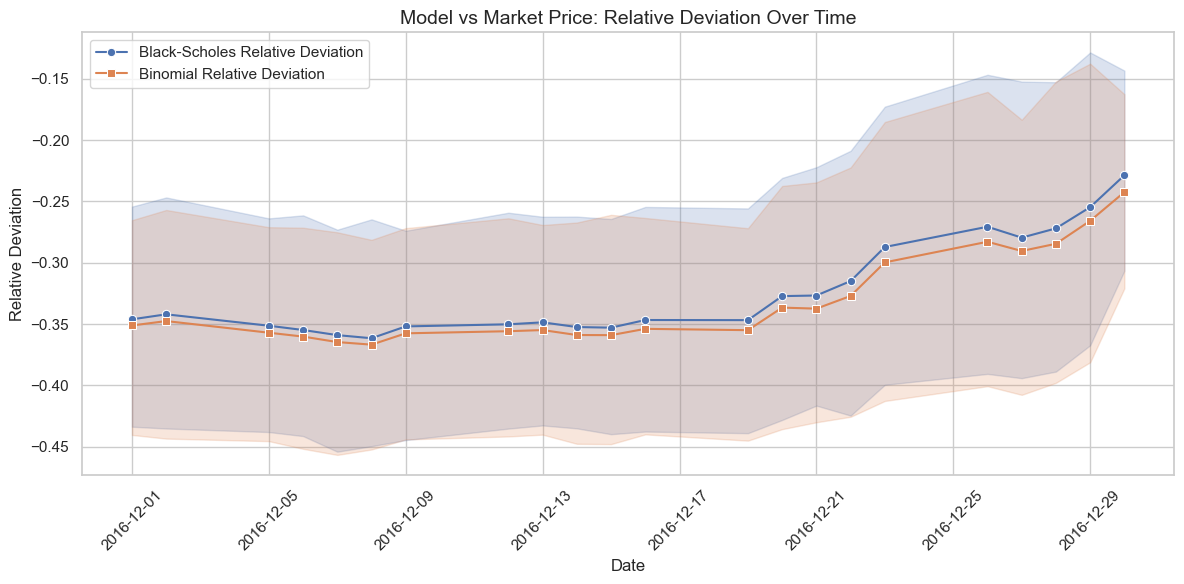

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')

# Create figure
plt.figure(figsize=(12, 6))

# Plot BS and Binomial relative deviations
sns.lineplot(
    x='Date', y='% BS Error', data=results_df,
    label='Black-Scholes Relative Deviation', marker='o'
)
sns.lineplot(
    x='Date', y='% Binomial Error', data=results_df,
    label='Binomial Relative Deviation', marker='s'
)

# Labeling and formatting
plt.xlabel('Date', fontsize=12)
plt.ylabel('Relative Deviation', fontsize=12)
plt.title('Model vs Market Price: Relative Deviation Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save and show
plt.savefig("1month_jan_feb_relative.png", dpi=300)
plt.show()


In [9]:
def backtest(options_df, model_name='BS'):
    initial_cash = 10000
    cash = initial_cash
    positions = []
    transaction_log = []

    for _, row in options_df.iterrows():
        model_price = row[f'{model_name} Price']
        market_price = row['Market Price']
        strike = row['Strike']
        option_type = row['Type']
        expiry = row['Expiry']
        current_date = row['Date']

        # Buy logic: Model says it's underpriced (>5% undervaluation)
        if model_price > 1.05 * market_price and cash >= market_price:
            positions.append({
                'purchase_price': market_price,
                'strike': strike,
                'expiry': expiry,
                'type': option_type
            })
            cash -= market_price
            transaction_log.append(f"[{current_date}] Bought {option_type} at ₹{market_price:.2f}")

        # Prepare to sell positions (safely without modifying while iterating)
        active_positions = []
        for position in positions:
            should_sell = (
                current_date >= position['expiry'] or
                model_price < 0.95 * market_price  # overvaluation
            )
            if should_sell:
                cash += market_price
                transaction_log.append(f"[{current_date}] Sold {position['type']} at ₹{market_price:.2f}")
            else:
                active_positions.append(position)
        positions = active_positions

    # Liquidate all remaining positions at their purchase price
    liquidation_value = sum(pos['purchase_price'] for pos in positions)
    final_cash = cash + liquidation_value
    profit_loss = final_cash - initial_cash

    return profit_loss, transaction_log


In [10]:
# Run backtests
profit_bs, log_bs = backtest(results_df, model_name='BS')
profit_binomial, log_bin = backtest(results_df, model_name='Binomial')

# Print results
print("🔹 Profit/Loss using Black-Scholes Model: ₹{:.2f}".format(profit_bs))
# print("\n".join(log_bs))  # Uncomment to see logs

print("\n🔹 Profit/Loss using Binomial Model: ₹{:.2f}".format(profit_binomial))
# print("\n".join(log_bin))  # Uncomment to see logs


🔹 Profit/Loss using Black-Scholes Model: ₹-5534.35

🔹 Profit/Loss using Binomial Model: ₹-4904.80
